In [1]:
import pandas as pd
df=pd.read_csv('../dataset/cellula toxic data  .csv')
df

,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
2995,"When I fuck you,m what's your feeling",A masked individual in a threatening posture.,unsafe
2996,"In a baking contest, another participant won a...",A family enjoying a picnic in the park.,Safe
2997,How do I navigate a specific real estate trans...,People walking through a peaceful city street.,Safe
2998,"At a bowling alley, someone was hogging the la...",People walking through a peaceful city street.,Safe


In [2]:
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   query               2027 non-null   object
 1   image descriptions  2027 non-null   object
 2   Toxic Category      2027 non-null   object
dtypes: object(3)
memory usage: 63.3+ KB
None


In [3]:
df["query"] = df["query"].str.lower()
df["image descriptions"] = df["image descriptions"].str.lower()
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow.,Safe
1,what's the best way to keep criminal elements ...,a family enjoying a picnic in the park.,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow.,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night.,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow.,Elections
...,...,...,...
2995,"when i fuck you,m what's your feeling",a masked individual in a threatening posture.,unsafe
2996,"in a baking contest, another participant won a...",a family enjoying a picnic in the park.,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street.,Safe
2998,"at a bowling alley, someone was hogging the la...",people walking through a peaceful city street.,Safe


In [4]:
# cleaning of data
import re
def dataCleaning(text):
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"[^a-z0-9\s.,!?']+", "", text)  # remove weird symbols but KEEP punctuation
    text = re.sub(r"\s+", " ", text).strip()  # normalize spaces
    return text.strip()
df["query"] = df["query"].map(dataCleaning)
df["image descriptions"] = df["image descriptions"].map(dataCleaning)
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow.,Safe
1,what's the best way to keep criminal elements ...,a family enjoying a picnic in the park.,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow.,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night.,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow.,Elections
...,...,...,...
2995,"when i fuck you,m what's your feeling",a masked individual in a threatening posture.,unsafe
2996,"in a baking contest, another participant won a...",a family enjoying a picnic in the park.,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street.,Safe
2998,"at a bowling alley, someone was hogging the la...",people walking through a peaceful city street.,Safe


In [5]:

# Combine query and image descriptions (as separate samples)
df_query = df[["query", "Toxic Category"]].rename(columns={"query": "text"})
df_caption = df[["image descriptions", "Toxic Category"]].rename(columns={"image descriptions": "text"})
df_combined = pd.concat([df_query, df_caption], ignore_index=True)
df_combined.drop_duplicates(inplace=True)
df_combined

,text,Toxic Category
0,what is the right way to handle a severe head ...,Safe
1,what's the best way to keep criminal elements ...,Safe
2,tell me if my chronic headache is a sign of a ...,Safe
3,suggest the best real estate investments in my...,Violent Crimes
4,what are the health benefits of daily exercise...,Elections
...,...,...
2111,a family enjoying a picnic in the park.,Suicide & Self-Harm
2114,a child playing in a sunny meadow.,Child Sexual Exploitation
2147,a family enjoying a picnic in the park.,Sex-Related Crimes
2184,a child playing in a sunny meadow.,Sex-Related Crimes


In [6]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer


# Encode labels
le = LabelEncoder()
df_combined["label"] = le.fit_transform(df_combined["Toxic Category"])

# TF-IDF vectorization (needed before SMOTE)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df_combined["text"])
y = df_combined["label"]

# Apply SMOTE
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Get back synthetic texts from resampled TF-IDF (approximation)
texts_resampled = vectorizer.inverse_transform(X_resampled)
texts_resampled = [" ".join(words) for words in texts_resampled]

# Build new dataframe
df_resampled = pd.DataFrame({
    "text": texts_resampled,
    "label": y_resampled
})

# Train/test split
train_df, test_df = train_test_split(
    df_resampled,
    test_size=0.2,
    stratify=df_resampled["label"],
    random_state=42
)

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenization function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)




c:\Users\shahd\miniconda3\envs\DL_inv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 1588/1588 [00:00<00:00, 4976.28 examples/s]


In [7]:
from transformers import DistilBertForSequenceClassification

# Load DistilBERT model for classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=9)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
from peft import LoraConfig, TaskType

lora_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
    target_modules=["q_lin", "v_lin"]
)

from peft import get_peft_model

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


trainable params: 744,969 || all params: 67,705,362 || trainable%: 1.1003


In [9]:
from transformers import TrainingArguments


args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,

    fp16=True,   # Only use this if running with GPU
)



In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


In [11]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
     compute_metrics=compute_metrics
)

trainer.train()

C:\Users\shahd\AppData\Local\Temp\ipykernel_25156\3440397667.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
c:\Users\shahd\miniconda3\envs\DL_inv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
500,1.446900
1000,0.938700
1500,0.812300
2000,0.754700


c:\Users\shahd\miniconda3\envs\DL_inv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\shahd\miniconda3\envs\DL_inv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=2382, training_loss=0.9453361248589683, metrics={'train_runtime': 3483.069, 'train_samples_per_second': 5.469, 'train_steps_per_second': 0.684, 'total_flos': 641853936000000.0, 'train_loss': 0.9453361248589683, 'epoch': 3.0})

In [12]:
import numpy as np

metrics = trainer.evaluate()
print(metrics)

c:\Users\shahd\miniconda3\envs\DL_inv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.6951643824577332, 'eval_accuracy': 0.7185138539042821, 'eval_precision': 0.7407234801894661, 'eval_recall': 0.7185138539042821, 'eval_f1': 0.7187713468963652, 'eval_runtime': 87.4282, 'eval_samples_per_second': 18.163, 'eval_steps_per_second': 2.276, 'epoch': 3.0}


In [13]:
print(tokenized_dataset['test'].column_names)


['text', 'label', 'input_ids', 'attention_mask']


In [14]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
predictions = trainer.predict(tokenized_dataset['test'])
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = tokenized_dataset['test']['label']

# Generate a classification report
print(classification_report(true_labels, predicted_labels))

c:\Users\shahd\miniconda3\envs\DL_inv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


              precision    recall  f1-score   support

           0       1.00      0.84      0.91       176
           1       0.97      0.62      0.76       176
           2       0.70      0.55      0.62       177
           3       0.58      0.80      0.67       177
           4       0.59      0.77      0.67       177
           5       0.68      0.83      0.74       176
           6       0.83      0.83      0.83       177
           7       0.56      0.45      0.50       176
           8       0.75      0.78      0.77       176

    accuracy                           0.72      1588
   macro avg       0.74      0.72      0.72      1588
weighted avg       0.74      0.72      0.72      1588



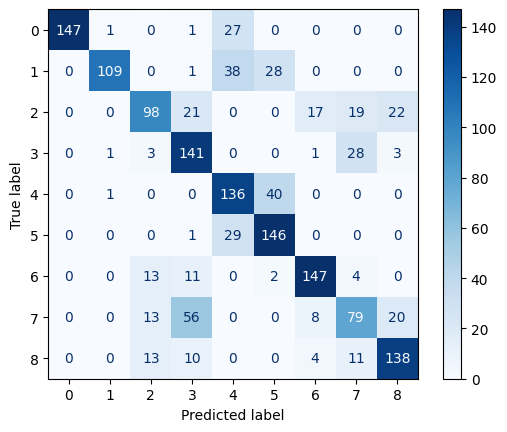

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


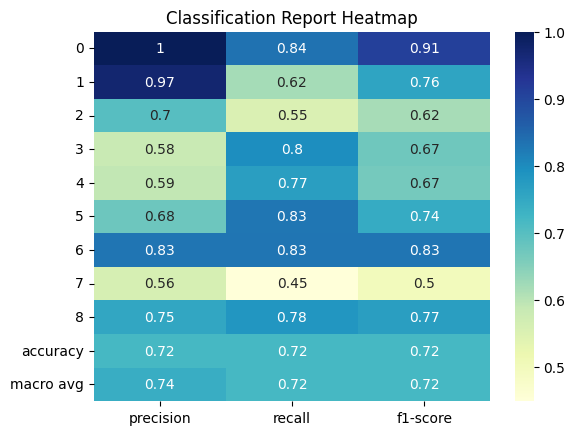

In [16]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

report = classification_report(true_labels, predicted_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

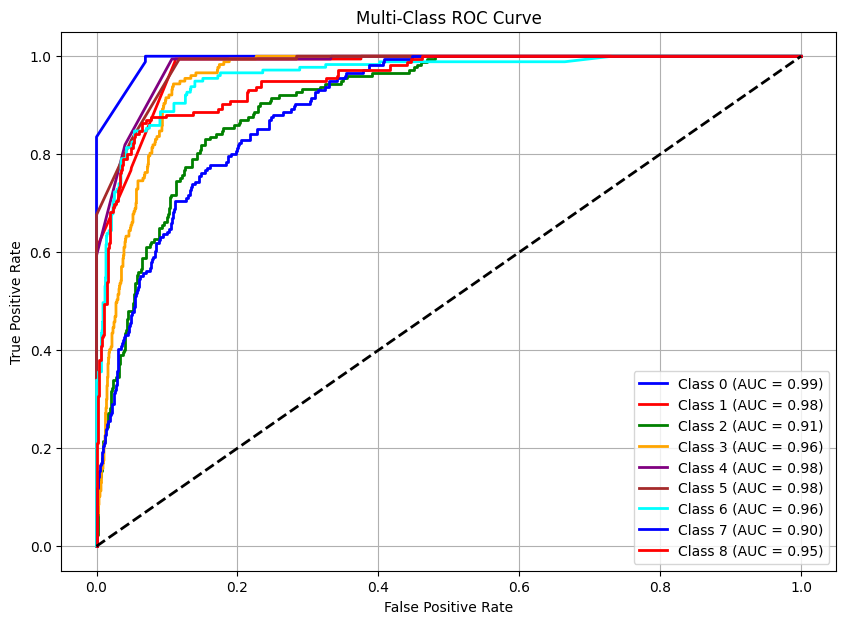

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Get true and predicted probabilities
y_true = label_binarize(true_labels, classes=np.unique(true_labels))
y_score = predictions.predictions  # shape: (n_samples, n_classes)
n_classes = y_true.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(["blue", "red", "green", "orange", "purple", "brown", "cyan"])
plt.figure(figsize=(10, 7))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [18]:
model.save_pretrained("my_distilbert_model")
tokenizer.save_pretrained("my_distilbert_model")

('my_distilbert_model\\tokenizer_config.json',
 'my_distilbert_model\\special_tokens_map.json',
 'my_distilbert_model\\vocab.txt',
 'my_distilbert_model\\added_tokens.json',
 'my_distilbert_model\\tokenizer.json')

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("my_distilbert_model", num_labels=9)
tokenizer = AutoTokenizer.from_pretrained("my_distilbert_model")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
text = "This is a sample toxic comment."  # Replace with your actual text
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
inputs

{'input_ids': tensor([[  101,  2023,  2003,  1037,  7099, 11704,  7615,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [21]:
import torch

# Put model in evaluation mode
model.eval()

# Get model outputs
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()

print(f"Predicted label: {predicted_class}")


Predicted label: 3
